## 2. Resolución de Sistemas Lineales y comparación de métodos

### Los métodos que utilizaremos están a continuación

#### 2.5.3.2. Iterative Solvers
#### the isolve module contains the following solvers:
- bicg (BIConjugate Gradient)
- bicgstab (BIConjugate Gradient STABilized)
- cg (Conjugate Gradient) - symmetric positive definite matrices only
- cgs (Conjugate Gradient Squared)
- gmres (Generalized Minimal RESidual)
- minres (MINimum RESidual)
- qmr (Quasi-Minimal Residual)

mandatory:

A : {sparse matrix, dense matrix, LinearOperator}
The N-by-N matrix of the linear system.

b : {array, matrix}
Right hand side of the linear system. Has shape (N,) or (N,1).

optional:

x0 : {array, matrix}
Starting guess for the solution.

tol : float
Relative tolerance to achieve before terminating.

maxiter : integer
Maximum number of iterations. Iteration will stop after maxiter steps even if the specified tolerance has not been achieved.

M : {sparse matrix, dense matrix, LinearOperator}
Preconditioner for A. The preconditioner should approximate the inverse of A. Effective preconditioning dramatically improves the rate of convergence, which implies that fewer iterations are needed to reach a given error tolerance.

callback : function
User-supplied function to call after each iteration. It is called as callback(xk), where xk is the current solution vector.

In [ ]:
import numpy as np
from scipy.sparse.linalg import LinearOperator
def mv(v):
    return np.array([2*v[0], 3*v[1]])

A = LinearOperator((2, 2), matvec=mv)
print(A)
A.matvec(np.ones(2))
A * np.ones(2)

In [ ]:
## https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html
from scipy.sparse import csc_matrix

#### BiCG
from scipy.sparse.linalg import bicg
xbicg, exitCode = bicg(A, b)
#### BiCGStab
from scipy.sparse.linalg import bicgstab
xbicgstab, exitCode = bicgstab(A, b)
# GMRES
from scipy.sparse.linalg import gmres
xgmres, exitCode = gmres(A, b)
# LGMRES
from scipy.sparse.linalg import lgmres
xlgmres, exitCode = lgmres(A, b)
# MINRES
from scipy.sparse.linalg import minres
xminres, exitCode = minres(A, b)
# QMR
from scipy.sparse.linalg import qmr
xqmr, exitCode = qmr(A, b)

### 2.1 GCROT
### Averifuar en qué consiste este método y en qué casoss se recomienda

#### scipy.sparse.linalg.gcrotmk(A, b, x0=None, tol=1e-05, maxiter=1000, M=None, callback=None, m=20, k=None, CU=None, discard_C=False, truncate='oldest', atol=None)[source]¶

- E. de Sturler, ‘’Truncation strategies for optimal Krylov subspace methods’’, SIAM J. Numer. Anal. 36, 864 (1999).
- J.E. Hicken and D.W. Zingg, ‘’A simplified and flexible variant of GCROT for solving nonsymmetric linear systems’’, SIAM J. Sci. Comput. 32, 172 (2010).
- M.L. Parks, E. de Sturler, G. Mackey, D.D. Johnson, S. Maiti, ‘’Recycling Krylov subspaces for sequences of linear systems’’, SIAM J. Sci. Comput. 28, 1651 (2006).



### 2.2 Comparación de Métodos Iterativos

Consideramos el problema en $D=(0,1)\times (0,1)$
$$ \beta\cdot \nabla u - \epsilon \Delta u=0,$$
$$ \beta=\alpha (\frac{\sqrt{2}}{2},\frac{\sqrt{2}}{2})^T,$$
condiciones de borde en $\partial D$
$$ u(x,y)=x^2+y^2,$$
en una malla equiespaciada $h=\frac{1}{N+1}$ de tamaño $N$
$$x_k=kh, \quad y_m=mh,$$
con aproximaciones de las derivadas dadas por
$$\frac{\partial^2 u}{\partial x^2}\approx \frac{1}{h^2}\big( u_{i+1,j} - 2 u_{ij} + u_{i-1,j}\big), \qquad \frac{\partial^2 u}{\partial y^2}\approx \frac{1}{h^2}\big(u_{i,j+1} - 2 u_{ij} + u_{i,j-1}\big),\$$

$$ \frac{\partial u}{\partial x}\approx \frac{1}{h}\big(u_{ij} - u_{i-1,j}\big), \quad           \frac{\partial u}{\partial y}\approx \frac{1}{h}\big(u_{i,j+1} - u_{ij}\big)$$
y genera el sistema lineal
$$ Au=b.$$

In [ ]:
# Pregunta 6 (A. Meister Aufgabe 6)
import numpy as np
from scipy.sparse import diags
import numpy.matlib
import scipy.sparse.linalg as spla

## Parameters
a = 0.5;       # Advection parameter
b = 2;         # Reaction parameter
tol = 1e-6;    # Tolerance for stopping criterion
maxit = 10000; # Maxium number of iterations
   
## Linear system
N = 99;
dx = 1/(N+1);
   
e = np.ones(N)
Dxx=diags([e, -2*e, e], [-1, 0, 1], shape=(N, N)).toarray()
#Dxx = spdiags([e -2*e e],[-1 0 1],N,N); # 1D central difference
ident=np.matlib.identity(N, dtype=float)

Axx = np.kron(ident,Dxx)/(dx**2);   # 2nd derivative with respect to x
Ayy = np.kron(Dxx,ident)/(dx**2);   # 2nd derivative with respect to y
   
Dx= diags([e, e], [-1, 1], shape=(N, N)).toarray()
#Dx = diags([-e e],[-1 1],N,N);         # 1D central difference
Ax= np.kron(ident,Dx)/(2*dx);
I = np.matlib.identity(N*N, dtype=float)
A = -Axx - Ayy -a*Ax - b*I;               # Matrix   
b = np.ones(N**2);                         # Right hand side
u0 = 0.5*np.ones(N**2);                       # Initial guess

In [92]:
print(A)

[[ 39998. -10025.      0. ...     -0.     -0.     -0.]
 [-10025.  39998. -10025. ...     -0.     -0.     -0.]
 [     0. -10025.  39998. ...     -0.     -0.     -0.]
 ...
 [    -0.     -0.     -0. ...  39998. -10025.      0.]
 [    -0.     -0.     -0. ... -10025.  39998. -10025.]
 [    -0.     -0.     -0. ...      0. -10025.  39998.]]


#### Ahora calculamos una solución óptima haciendo correr un método intensivamente. Aquí, tolerancia 1/10000 que entrega una solución estable de bajo error

In [48]:
#
# Aproximación de la solución óptima
#
xv, exitCode = gmres(A, b,x0=u0,tol=1/10000)
print(xv)

#### El trabajo consiste en hacer dos gráficas con todos los métodos en cada gráfica para compara los métodos cambiando el número de iteraciones y el error de aproximación (tolerancia)
#### Para calcular los residuos, ejemplificamos con el método GMRES con las correspondientes dos gráficas para
1. Cambiando el número de iteraciones
2. Cambiando la tolerancia del error de aproximación 

In [94]:
#
# Datos del método GMRES cambiando las iteraciones
#
from numpy import linalg as la
dataplot=np.zeros((10,2))
nxv=la.norm(xv)
for k in range(10):
   x, exitCode = gmres(A, b,x0=u0,maxiter=10*k)
   print(10*k,la.norm(x-xv)/nxv)
   dataplot[k,0]=k
   dataplot[k,1]=la.norm(x-xv)/nxv

0 19.356809037683995
10 11.88115524921087
20 8.12439247477894
30 5.627786708858102
40 3.912396286940429
50 2.7211548432044887
60 1.8928884228728469
70 1.31685381459222
80 0.9161906291719276
90 0.6374835773997481


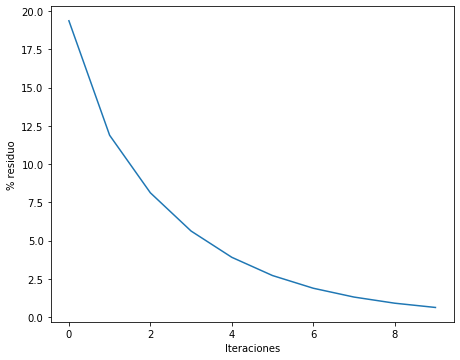

In [95]:
B= [val[1] for val in dataplot]
newdata = np.squeeze(B)
fig, ax = plt.subplots(figsize=(8, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(newdata)
ax.set_xlabel('Iteraciones')
ax.set_ylabel('% residuo')
plt.show()

In [ ]:
#
# Datos del método GMRES cambiando la tolerancia
#
dataplot=np.zeros((10,2))
nxv=la.norm(xv)
for k in range(10):
   x, exitCode = gmres(A, b,x0=u0,tol=1/((k+1)*100))
   print(1/((k+1)*100),la.norm(x-xv)/nxv)
   dataplot[k,0]=1/((k+1)*100)
   dataplot[k,1]=la.norm(x-xv)/nxv

In [ ]:
B= [val[1] for val in dataplot]
newdata = np.squeeze(B)
fig, ax = plt.subplots(figsize=(8, 6))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(newdata)
ax.set_xlabel('tolerancia 1/(100*k)')
ax.set_ylabel('% residuo')
plt.show()